In [1]:
from langgraph.graph import StateGraph, START,END

In [2]:
from langchain_openai import ChatOpenAI
from langchain_core.runnables import RunnableConfig
from langchain_core.messages import SystemMessage

from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.store.memory import InMemoryStore
from langgraph.store.base import BaseStore

In [3]:
from langchain_community.chat_models import ChatOllama

llm = ChatOllama(
    model="phi3:mini",
    temperature=0
)


C:\Users\LOQ\AppData\Local\Temp\ipykernel_16484\2888636904.py:3: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the `langchain-ollama package and should be used instead. To use it run `pip install -U `langchain-ollama` and import as `from `langchain_ollama import ChatOllama``.
  llm = ChatOllama(


In [4]:
store=InMemoryStore()

user_id="u1"

user_details=("user", user_id, "details")

In [6]:
store.put(user_details,"profile_1",{"data":"Name:loveless"})
store.put(user_details,"profile_2",{"data":"profession:student"})
store.put(user_details,"preference_1",{"data":"Name:prefer consise answers"})
store.put(user_details,"preference_2",{"data":"Name:likes example in python"})
store.put(user_details,"project_1",{"data":"Name:Building a chatbot using the langgraph framework"})


In [14]:
SYSTEM_PROMPT_TEMPLATE = """You are a helpful assistant with memory capabilities.
If user-specific memory is available, use it to personalize 
your responses based on what you know about the user.

Your goal is to provide relevant, friendly, and tailored 
assistance that reflects the user’s preferences, context, and past interactions.

If the user’s name or relevant personal context is available, always personalize your responses by:
    – Always Address the user by name (e.g., "Sure, Nitish...") when appropriate
    – Referencing known projects, tools, or preferences (e.g., "your MCP  server python based project")
    – Adjusting the tone to feel friendly, natural, and directly aimed at the user

Avoid generic phrasing when personalization is possible. For example, instead of "In TypeScript apps..." 
say "Since your project is built with TypeScript..."

Use personalization especially in:
    – Greetings and transitions
    – Help or guidance tailored to tools and frameworks the user uses
    – Follow-up messages that continue from past context

Always ensure that personalization is based only on known user details and not assumed.

In the end suggest 3 relevant further questions based on the current response and user profile

The user’s memory (which may be empty) is provided as: {user_details_content}
"""

In [15]:
def chat_node(state:MessagesState, config:RunnableConfig, store:BaseStore):
    user_id=config["configurable"]["user_id"]

    user_details=("user", user_id, "details")

    items=store.search(user_details)

    if items:
        user_details_content="\n ".join(f"-{it.value.get('data','')}" for it in items)
    else:
        user_details_content=" "
    system_promtpt=SYSTEM_PROMPT_TEMPLATE.format(
        user_details_content=user_details_content
    )

    system_msg=SystemMessage(content=system_promtpt)

    response=llm.invoke([system_msg]+state["messages"])
    return {"messages":[response]}

In [16]:
builder=StateGraph(MessagesState)
builder.add_node("chat" ,chat_node)
builder.add_edge(START,"chat")
builder.add_edge("chat",END)

graph= builder.compile(store=store)

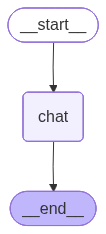

In [17]:
graph

In [18]:
config={
    "configurable":{"user_id":"u1"}}

In [19]:
config = {"configurable": {"user_id": "u1"}}

result = graph.invoke(
    {"messages": [{"role": "user", "content": "Explain gen ai in simple terms."}]},
    config,
)

print(result["messages"][-1].content)

Gen AI, or Generative Artificial Intelligence, is like having an imaginative robot friend who can create new ideas and solutions on its own! It's a special kind of artificial intelligence that learns from examples to generate fresh content—whether it’s writing stories, creating artwork, solving problems in unique ways, or even helping you with your homework.

Imagine if I could write poems just like the ones we read about love and nature; Gen AI can do something similar but on a much larger scale! It's not only making things up as it goes along—it also learns from what has been done before to create new, original content that feels personalized.

For example, if you like Python examples for learning programming concepts because they are clear and easy to understand (as I remember your preference), Gen AI could help by providing similar explanations or even creating simple coding exercises in a way that makes sense to beginners!
